# Régression linéaire avec Sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Data_reg/reg_simple.csv')
df.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [3]:
df.tail()

,heure_rev,note
22,24,79
23,25,84
24,26,93
25,29,98
26,30,99


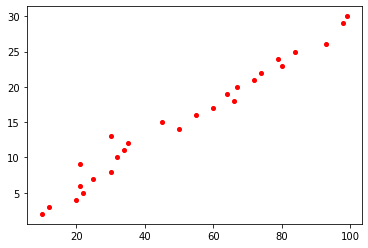

In [4]:
plt.plot(df['note'], df['heure_rev'], 'ro', markersize=4)
plt.show()

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X.shape

(27, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

### Visualisation

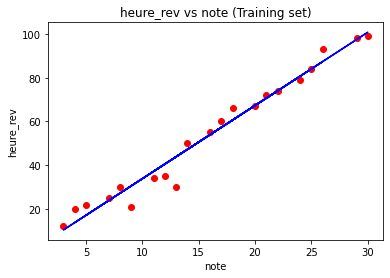

In [9]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('heure_rev vs note (Training set)')
plt.xlabel('note')
plt.ylabel('heure_rev')
plt.show()

# Régression multiple avec Sklearn

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [11]:
data_house = pd.read_csv("Data_reg/boston_house_prices.csv")

In [12]:
data_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Que signifie les abréviations ?**<br>


CRIM: Per capita crime rate by town<br>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br>
INDUS: Proportion of non-retail business acres per town<br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
NOX: Nitric oxide concentration (parts per 10 million)<br>
RM: Average number of rooms per dwelling<br>
AGE: Proportion of owner-occupied units built prior to 1940<br>
DIS: Weighted distances to five Boston employment centers<br>
RAD: Index of accessibility to radial highways<br>
TAX: Full-value property tax rate per 10,000<br>
PTRATIO: Pupil-teacher ratio by town <br>
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town <br>
LSTAT: Percentage of lower status of the population<br>
MEDV: Median value of owner-occupied homes in $1000s

In [13]:
print(data_house.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [14]:
# Vérifions qu'il n'y a pas de valeur nulle
data_house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Préparation de la data pour l'entraînement du modèle

In [15]:
X = data_house.iloc[:, :-1].values
y = data_house.iloc[:, -1].values

In [16]:
X.shape


(506, 13)

In [17]:
y.shape

(506,)

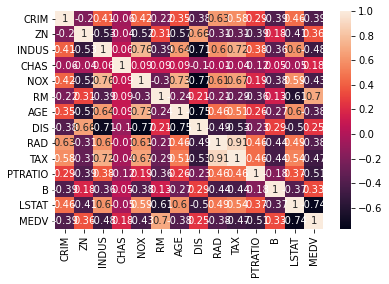

In [18]:
# Matrice de corrélation (avec la fonction corr de pandas et la fonction heatmap de seaborn pour l'affichage)

matrice_correlation = data_house.corr().round(2)
sns.heatmap(data=matrice_correlation, annot=True)

### Séparation des données entre test_set et train_set

In [19]:
# 80% pour train et 20% pour test
# train_test_split (sklearn)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,)

In [20]:
# On peut afficher la shape des nouvelles valeurs 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Standardisation des données

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Entraînement des modèles

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# Visualisation 3D


In [23]:
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
#fig= plt.figure()
#ax=fig.add_subplot(111,projection='3d')
#plt.xlabel("X_train[:,0]")
#plt.ylabel("Y_train")
#ax.scatter(X_train[:,0],X_train[:,2],Y_train)
#ax.scatter(X_train[:,0],X_train[:,2],y_pred_train,color = 'yellow')

### Evaluation du modèle

In [24]:
# On utilise RMSE et R²-score.
from sklearn.metrics import r2_score

# Evaluation du modèle (training set)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("La performance du modèle pour training set")
print("--------------------------------------")
print('RMSE est de : {}'.format(rmse))
print('R2 score est de : {}'.format(r2))
print("\n")

# Evaluation du modèle (testing set)

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# Score r-squared pour le modèle
r2 = r2_score(Y_test, y_test_predict)

print("La performance du modèle pour testing set")
print("--------------------------------------")
print('RMSE est de : {}'.format(rmse))
print('R2 score est de : {}'.format(r2))

La performance du modèle pour training set
--------------------------------------
RMSE est de : 4.634827691042286
R2 score est de : 0.7509968983851529


La performance du modèle pour testing set
--------------------------------------
RMSE est de : 4.957737996728158
R2 score est de : 0.6811543898402181


### Évaluez les résultats obtenus en utilisant la fonction mean_squared_error de sklearn

In [25]:
# Root Mean Square Error

from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(Y_test, y_test_predict)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)


Root Mean Square Error:

4.957737996728158


# Régression polynomiale avec Sklearn

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
df = pd.read_csv("Data_reg/Position_Salaries.csv")

df.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [28]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

x.shape


(10, 1)

In [29]:
#fractionner jeu de données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [30]:
# On lance le modèle de régresion linéaire

from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg.fit(x, y)

LinearRegression()

<function matplotlib.pyplot.show(*args, **kw)>

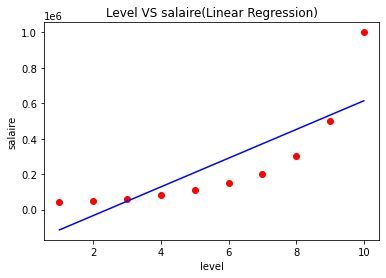

In [31]:
#On peut visualiser les données

plt.scatter(x, y, color = 'red')
plt.plot(x, Reg.predict(x), color = 'blue')
plt.title('Level VS salaire(Linear Regression)')
plt.xlabel('level')
plt.ylabel('salaire')
plt.show

In [32]:
# On lance le modèle de régression polynomiale 

poly_reg = PolynomialFeatures(degree = 3)
X_poly_train =poly_reg.fit_transform(X_train)
X_poly_test =poly_reg.fit_transform(X_test)


In [33]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression()

In [34]:
#Predicting the Test set results
y_pred = lin_reg_2.predict(X_poly_test)

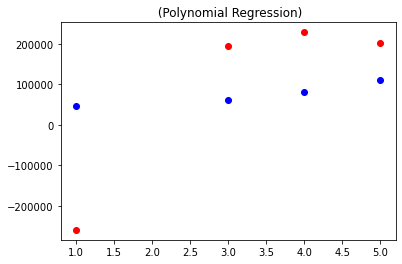

In [35]:
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'red')
plt.title(' (Polynomial Regression)')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [36]:
#Evaluer le modèle avec coef de détermination avec mean squarred error
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score est de : {}'.format(r2))


R2 score est de : -58.62444319764959


## Régression polynomiale avec les données "qualite_vin_rouge.csv"

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [38]:
df = pd.read_csv("Data_reg/qualite-vin-rouge.csv")

df.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
print(df)

      acidité fixe  acidité volatile  acide citrique  sucre résiduel  \
0              7.4             0.700            0.00             1.9   
1              7.8             0.880            0.00             2.6   
2              7.8             0.760            0.04             2.3   
3             11.2             0.280            0.56             1.9   
4              7.4             0.700            0.00             1.9   
...            ...               ...             ...             ...   
1594           6.2             0.600            0.08             2.0   
1595           5.9             0.550            0.10             2.2   
1596           6.3             0.510            0.13             2.3   
1597           5.9             0.645            0.12             2.0   
1598           6.0             0.310            0.47             3.6   

      chlorures  dioxyde de soufre libre  anhydride sulfureux total  densité  \
0         0.076                     11.0               

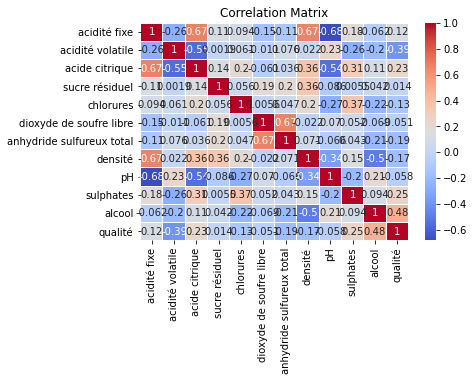

In [40]:
# matrice de corrélation

plt.title("Correlation Matrix")
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

En voyant cette image, on peut sélectionner uniquement la variable "densité", "acide citrique", "acide fixe", "dioxyde de souffre libre", "anhydrique sulfureux total"

In [41]:
x=np.array(df[['alcool']])
y=np.array(df[['qualité']])


In [42]:
x.shape

(1599, 1)

In [43]:
y.shape

(1599, 1)

In [44]:
#fractionner jeu de données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [45]:
# On lance le modèle de régresion linéaire

from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x, y)

LinearRegression()

<function matplotlib.pyplot.show(*args, **kw)>

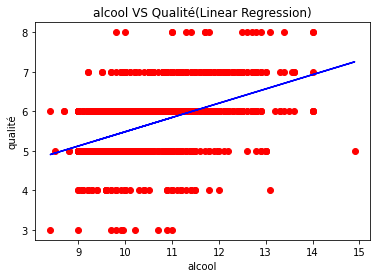

In [46]:
#On peut visualiser les données

plt.scatter(x, y, color = 'red')
plt.plot(x, LinReg.predict(x), color = 'blue')
plt.title('alcool VS Qualité(Linear Regression)')
plt.xlabel('alcool')
plt.ylabel('qualité')
plt.show

In [47]:
# On lance le modèle de régression polynomiale 

poly_reg = PolynomialFeatures(degree = 3)
X_poly_train =poly_reg.fit_transform(X_train)
X_poly_test =poly_reg.fit_transform(X_test)


In [48]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression()

In [49]:
#Predicting the Test set results
y_pred = lin_reg_2.predict(X_poly_test)

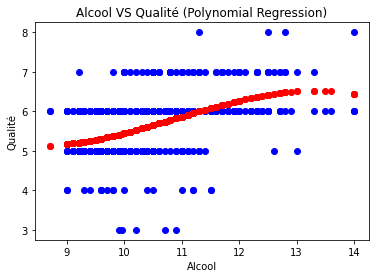

In [50]:
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'red')
plt.title('Alcool VS Qualité (Polynomial Regression)')
plt.xlabel('Alcool')
plt.ylabel('Qualité')
plt.show()

In [51]:
#Evaluer le modèle avec coef de détermination avec mean squarred error
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score est de : {}'.format(r2))


R2 score est de : 0.23393425551620728
